In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
import librosa.display
import librosa

In [2]:
# Stores an audio file for easy playback
class Audio():
    def __init__(self, filename):
        self.filename = filename
        self.chunk = 1024
        
        with wave.open(filename, 'rb') as wf:
            self.rate = wf.getframerate()
            self.total_sample_size = wf.getnframes()
    
    def time_series(self):
        return librosa.load(self.filename, sr=self.rate)[0]
    
#     Return the sample size for the given duration, return the maximum length of the sample size if duration exceed the sample's duration
    def get_sample_size(self, duration):
        return min(self.rate * duration, self.total_sample_size)
    
#     Play the audio file for the given duration, play the whole file if duration is not given
    def play(self, duration=0):
        wf = wave.open(self.filename, 'rb')
        p = pyaudio.PyAudio()
        
        stream = p.open(format =
                p.get_format_from_width(wf.getsampwidth()),
                channels = wf.getnchannels(),
                rate = wf.getframerate(),
                output = True)
        
        if duration:
            d_chunk = duration * wf.getframerate()
            data = wf.readframes(d_chunk)
            stream.write(data)
        else:
            data = wf.readframes(self.chunk)

            while len(data) > 0:
                stream.write(data)
                data = wf.readframes(self.chunk)
        
        stream.close()
        p.terminate()
        wf.close()

In [3]:
def plot_magnitude_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.abs(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Magnitude versus Frequency')
    plt.plot(t,D)
    plt.show()

In [4]:
def plot_phase_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]
    
    D = np.angle(librosa.stft(x, n_fft=n_fft, hop_length=hop_length))
    t = np.arange(len(D))
    plt.title('Phase versus Frequency')
    plt.plot(t,D)
    plt.show()

In [5]:
# x = floating point time series of audio files
# num_samples = number of samples to plot
def plot_db_scaled_spectogram(x, num_samples=5000, n_fft=2048, hop_length=512):
    x = x[:num_samples]

    D = librosa.amplitude_to_db(librosa.stft(x, n_fft=n_fft, hop_length=hop_length), ref=np.max)
    print(D.shape)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title('DB spectogram')
    plt.show()

In [6]:
# y = floating point time series of audio files
# num_samples = number of samples to plot
def plot_wave(y, num_samples=5000):
    y = y[:num_samples]
    
    x = np.arange(num_samples)
    
    plt.plot(x,y)
    plt.show()

In [7]:
ex_1 = Audio("./working_data/abbott_10.wav")
ex_2 = Audio("./working_data/optic_10.wav")
ex_3 = Audio("./working_data/aeschylus_10.wav")

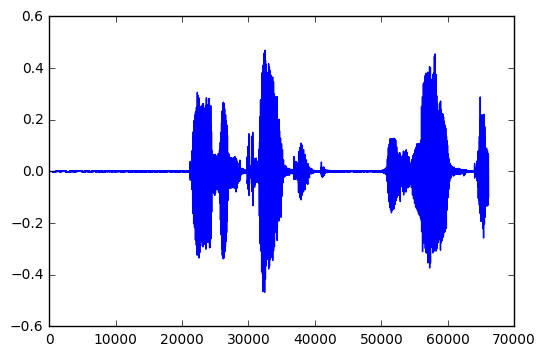

(1025, 130)


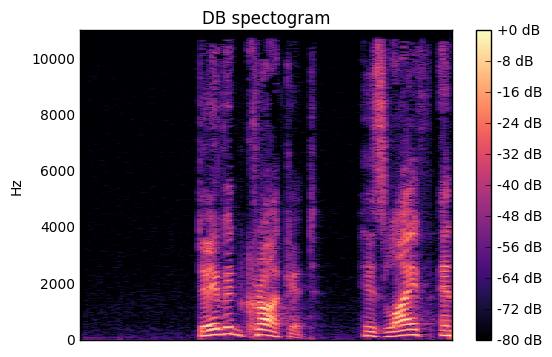

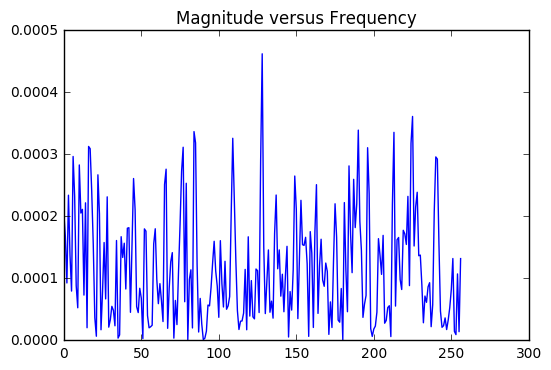

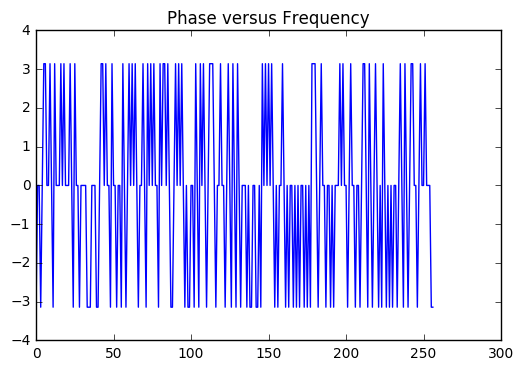

In [8]:
ex_1_size = ex_1.get_sample_size(3)
plot_wave(ex_1.time_series(), ex_1_size)
plot_db_scaled_spectogram(ex_1.time_series(), ex_1_size)
plot_magnitude_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)
plot_phase_spectogram(ex_1.time_series(), ex_1_size, 512, ex_1_size+1)

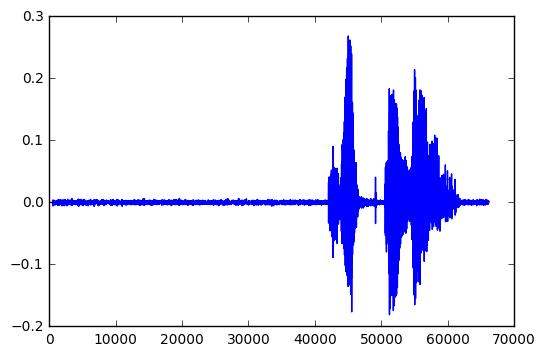

(1025, 130)


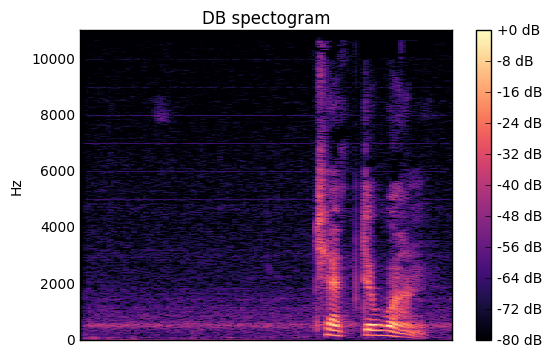

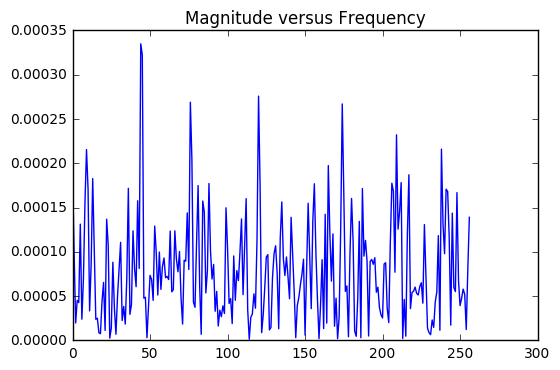

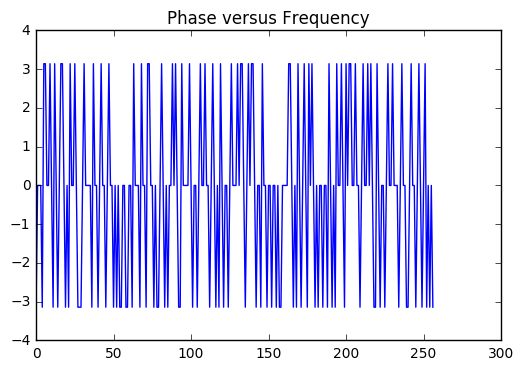

In [9]:
ex_2_size = ex_2.get_sample_size(3)
plot_wave(ex_2.time_series(), ex_2_size)
plot_db_scaled_spectogram(ex_2.time_series(), ex_2_size)
plot_magnitude_spectogram(ex_2.time_series(), ex_2_size, 512, ex_2_size+1)
plot_phase_spectogram(ex_2.time_series(), ex_2_size, 512, ex_2_size+1)

(1025, 130)


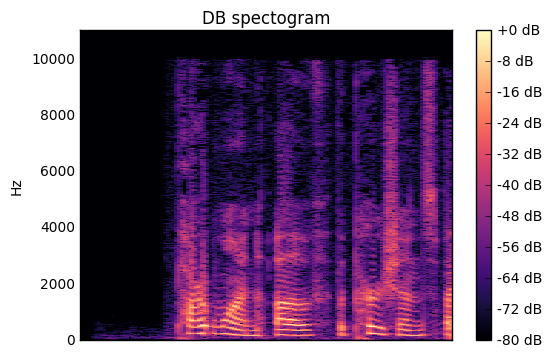

In [10]:
ex_3_size = ex_3.get_sample_size(3)
# plot_wave(ex_3.time_series(), ex_3_size)
plot_db_scaled_spectogram(ex_3.time_series(), ex_3_size, 2048, 512)
# plot_magnitude_spectogram(ex_3.time_series(), ex_3_size, 512, ex_3_size+1)
# plot_phase_spectogram(ex_3.time_series(), ex_3_size, 512, ex_3_size+1)

### Classifying Audio

In [11]:
from sklearn import neighbors

In [12]:
def convert_audio_to_example(audio, label, n_fft=2048, hop_length=512):
    D = librosa.stft(audio.time_series(), n_fft=n_fft, hop_length=hop_length)
    D = np.transpose(D)
    
    D = np.insert(D, D.shape[1], label, 1)
    return D

In [13]:
E_1 = convert_audio_to_example(ex_1, 0, 2048, ex_1.rate)
E_2 = convert_audio_to_example(ex_2, 1, 2048, ex_2.rate)
E_3 = convert_audio_to_example(ex_3, 2, 2048, ex_3.rate)
E = np.concatenate([E_1, E_2, E_3])
np.random.shuffle(E)
train = E[:1400]
test = E[1400:]

In [14]:
features = np.abs(train[:,:-1])
labels = np.abs(train[:,-1])

knn = neighbors.KNeighborsClassifier()
knn.fit(features, labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
features_t = np.abs(test[:,:-1])
labels_t = np.abs(test[:,-1])

knn.score(features_t, labels_t)

0.81132075471698117